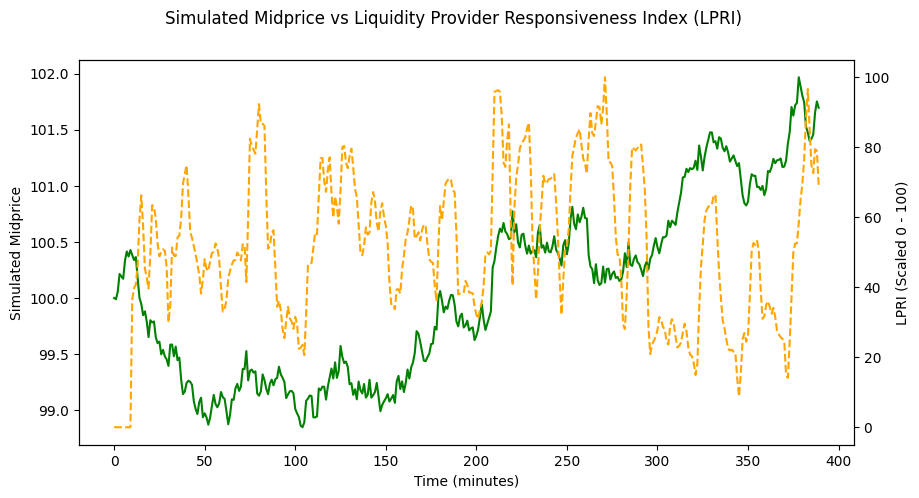

In [ ]:
# --- Liquidity Provider Responsiveness Index (LPRI) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Price Process Parameters ---

S0 = 100
mu = 0.01
sigma = 0.02

# --- Simulation Parameters ---

np.random.seed(42)
n_simulations = 1
n_steps = 390
T = 1
dt = T / n_steps

# --- Geometric Brownian Motion Pricing Simulation ---

S = np.zeros((n_steps, n_simulations))
dW = np.random.standard_normal((n_steps, n_simulations))

for i in range(n_simulations):
    S[0, i] = S0
    for t in range(1, n_steps):
        S[t, i] = S[t - 1, i] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dW[t, i])

S_df = pd.DataFrame(S, columns = ['S_t'])
S_df

# --- Stock Returns Computation and DataFrame Formation ---

S_df['r_t'] = np.log(S_df['S_t'] / S_df['S_t'].shift(1))

S_df = S_df.fillna(0)

S_df['r_t^2'] = S_df['r_t'] ** 2

window = 10

S_df['sigma_t'] = S_df['r_t'].rolling(window = window).std()

S_df = S_df.fillna(0)

S_df

# --- Dynamic Quote Adjustment Model and Parameters ---

# PLACEHOLDERS
a = 0.40
b = 0.10
c = 0.15
d = 0.30

S_df['spread_t'] = a + b * S_df['sigma_t']
S_df['depth_t'] = c * np.exp(- d * S_df['sigma_t'])

S_df['LPRI_t'] = ((S_df['spread_t'] / S_df['depth_t']) - (S_df
['spread_t'].shift(1) / S_df['depth_t'].shift(1))) / (S_df['sigma_t'] - S_df['sigma_t'].shift(1))

S_df.fillna(0)

S_df['LPRI_scaled'] = ((S_df['LPRI_t'] - np.nanmin(S_df['LPRI_t'])) / (np.nanmax(S_df['LPRI_t']) - np.nanmin(S_df['LPRI_t']))) * 100

S_df = S_df.fillna(0)

# --- Data Visualisations ---

fig, ax1 = plt.subplots(figsize = (10,5));
ax2 = ax1.twinx();
ax1.plot(S_df['S_t'], color = 'green');
ax2.plot(S_df['LPRI_scaled'], '--', color = 'orange');
ax1.set_xlabel('Time (minutes)');
ax1.set_ylabel('Simulated Midprice');
ax2.set_ylabel('LPRI (Scaled 0 - 100)');
fig.suptitle('Simulated Midprice vs Liquidity Provider Responsiveness Index (LPRI)');
plt.show();


